In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_excel(r"C:\Users\there\Downloads\updated_healthcare_dataset.xlsx")
df.head()

,encounter_id,patient_id,Name,Age,Gender,Blood_Type,Medical_Condition,doctor_id,Doctor,hospital_id,insurance_provider_id,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Date_of_Admission,Discharge_Date,Medication,Test_Results,Length_Of_Stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,17536,Medicare,37490.983364,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,97562,UnitedHealthcare,47304.064845,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,36710,Medicare,36874.896997,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,70210,Medicare,23303.322092,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,92038,UnitedHealthcare,18086.344184,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24


In [5]:
# Data preprocessing and feature engineering

In [6]:
df.isnull().sum()

encounter_id             0
patient_id               0
Name                     0
Age                      0
Gender                   0
Blood_Type               0
Medical_Condition        0
doctor_id                0
Doctor                   0
hospital_id              0
insurance_provider_id    0
Insurance_Provider       0
Billing_Amount           0
Room_Number              0
Admission_Type           0
Date_of_Admission        0
Discharge_Date           0
Medication               0
Test_Results             0
Length_Of_Stay           0
dtype: int64

In [7]:
label_encoders = {}
for col in ['Gender', 'Test_Results']:
    le = LabelEncoder()
    df[col + '_Label'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
admission_order = {'Elective': 0, 'Urgent': 1, 'Emergency': 2}
df['Type_of_Admission_Ordinal'] = df['Admission_Type'].map(admission_order)

In [9]:
onehot_cols = ['Blood_Type', 'Medical_Condition', 'Insurance_Provider']
ohe = OneHotEncoder(drop=None, sparse_output=False)
encoded_array = ohe.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(onehot_cols), index=df.index)
df = pd.concat([df, encoded_df], axis=1)  

In [10]:
if 'Doctor' in df.columns and 'Test_Results_Label' in df.columns:
    doctor_target_mean = df.groupby('Doctor')['Test_Results_Label'].mean()
    df['Doctor_TargetEnc'] = df['Doctor'].map(doctor_target_mean)

In [11]:
print(df.head())

   encounter_id  patient_id                 Name  Age  Gender Blood_Type  \
0             1    48559735      Tiffany Ramirez   81  Female         O-   
1             2    68988993          Ruben Burns   35    Male         O+   
2             3    57429465            Chad Byrd   61    Male         B-   
3             4    44487379    Antonio Frederick   49    Male         B-   
4             5    57789449  Mrs. Brandy Flowers   51    Male         O-   

  Medical_Condition  doctor_id          Doctor  hospital_id  ...  \
0          Diabetes      24379  Patrick Parker         8130  ...   
1            Asthma      54845   Diane Jackson         7856  ...   
2           Obesity      88087      Paul Baker         4494  ...   
3            Asthma      22426  Brian Chandler         8117  ...   
4         Arthritis      84765  Dustin Griffin         7259  ...   

   Medical_Condition_Cancer Medical_Condition_Diabetes  \
0                       0.0                        1.0   
1                 

In [12]:
print(df.columns.tolist())

['encounter_id', 'patient_id', 'Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition', 'doctor_id', 'Doctor', 'hospital_id', 'insurance_provider_id', 'Insurance_Provider', 'Billing_Amount', 'Room_Number', 'Admission_Type', 'Date_of_Admission', 'Discharge_Date', 'Medication', 'Test_Results', 'Length_Of_Stay', 'Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal', 'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-', 'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-', 'Medical_Condition_Arthritis', 'Medical_Condition_Asthma', 'Medical_Condition_Cancer', 'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension', 'Medical_Condition_Obesity', 'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross', 'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare', 'Insurance_Provider_UnitedHealthcare', 'Doctor_TargetEnc']


In [13]:
df = df.loc[:, ~df.columns.duplicated()]

In [14]:
print(df.columns.tolist())

['encounter_id', 'patient_id', 'Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition', 'doctor_id', 'Doctor', 'hospital_id', 'insurance_provider_id', 'Insurance_Provider', 'Billing_Amount', 'Room_Number', 'Admission_Type', 'Date_of_Admission', 'Discharge_Date', 'Medication', 'Test_Results', 'Length_Of_Stay', 'Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal', 'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-', 'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-', 'Medical_Condition_Arthritis', 'Medical_Condition_Asthma', 'Medical_Condition_Cancer', 'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension', 'Medical_Condition_Obesity', 'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross', 'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare', 'Insurance_Provider_UnitedHealthcare', 'Doctor_TargetEnc']


In [15]:
original_encoded_cols = [
    'Gender', 
    'Blood_Type', 
    'Admission_Type', 
    'Doctor', 
    'Test_Results', 
    'Medication',
    'Medical_Condition',
    'Insurance_Provider']
df.drop(columns=[col for col in original_encoded_cols if col in df.columns], inplace=True)

In [16]:
print(df.columns.tolist())

['encounter_id', 'patient_id', 'Name', 'Age', 'doctor_id', 'hospital_id', 'insurance_provider_id', 'Billing_Amount', 'Room_Number', 'Date_of_Admission', 'Discharge_Date', 'Length_Of_Stay', 'Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal', 'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-', 'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-', 'Medical_Condition_Arthritis', 'Medical_Condition_Asthma', 'Medical_Condition_Cancer', 'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension', 'Medical_Condition_Obesity', 'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross', 'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare', 'Insurance_Provider_UnitedHealthcare', 'Doctor_TargetEnc']


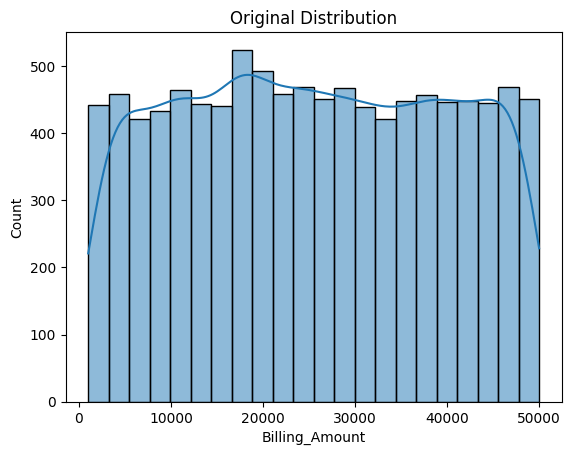

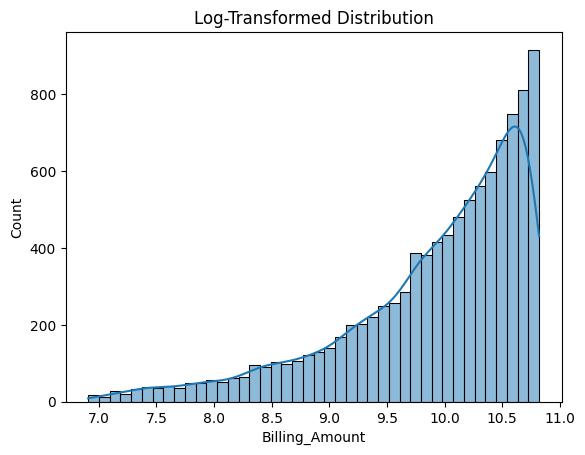

In [17]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns
positive_cols = [col for col in numeric_cols if (df[col] > 0).all()]
for col in positive_cols:
    df[col + '_log'] = np.log(df[col])


import seaborn as sns
import matplotlib.pyplot as plt

col = 'Billing_Amount'

sns.histplot(df[col], kde=True)
plt.title("Original Distribution")
plt.show()

sns.histplot(np.log(df[col]), kde=True)
plt.title("Log-Transformed Distribution")
plt.show()


In [18]:
print(df.columns.tolist())

['encounter_id', 'patient_id', 'Name', 'Age', 'doctor_id', 'hospital_id', 'insurance_provider_id', 'Billing_Amount', 'Room_Number', 'Date_of_Admission', 'Discharge_Date', 'Length_Of_Stay', 'Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal', 'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-', 'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-', 'Medical_Condition_Arthritis', 'Medical_Condition_Asthma', 'Medical_Condition_Cancer', 'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension', 'Medical_Condition_Obesity', 'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross', 'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare', 'Insurance_Provider_UnitedHealthcare', 'Doctor_TargetEnc', 'encounter_id_log', 'patient_id_log', 'Age_log', 'doctor_id_log', 'hospital_id_log', 'insurance_provider_id_log', 'Billing_Amount_log', 'Room_Number_log', 'Length_Of_Stay_log']


In [19]:
from sklearn.preprocessing import StandardScaler
log_columns = [col for col in df.columns if col.endswith('_log')]
scaler = StandardScaler()
df[log_columns] = scaler.fit_transform(df[log_columns])
df.head()

,encounter_id,patient_id,Name,Age,doctor_id,hospital_id,insurance_provider_id,Billing_Amount,Room_Number,Date_of_Admission,...,Doctor_TargetEnc,encounter_id_log,patient_id_log,Age_log,doctor_id_log,hospital_id_log,insurance_provider_id_log,Billing_Amount_log,Room_Number_log,Length_Of_Stay_log
0,1,48559735,Tiffany Ramirez,81,24379,8130,17536,37490.983364,146,2022-11-17,...,1.0,-8.231623,0.035539,1.248681,-1.142723,0.893587,-1.674252,0.768042,-1.454045,0.169900
1,2,68988993,Ruben Burns,35,54845,7856,97562,47304.064845,404,2023-06-01,...,2.0,-7.536726,0.635488,-0.696435,0.235334,0.834867,1.209095,1.053055,0.881577,0.169900
2,3,57429465,Chad Byrd,61,88087,4494,36710,36874.896997,292,2019-01-09,...,2.0,-7.130237,0.322164,0.591326,1.040652,-0.121786,-0.433046,0.747729,0.136559,1.095491
3,4,44487379,Antonio Frederick,49,22426,8117,70210,23303.322092,480,2020-05-02,...,0.0,-6.841829,-0.114108,0.083540,-1.284646,0.890846,0.656365,0.185128,1.277127,-3.035138
4,5,57789449,Mrs. Brandy Flowers,51,84765,7259,92038,18086.344184,477,2021-07-09,...,2.0,-6.618122,0.332840,0.176276,0.975313,0.699496,1.111171,-0.125559,1.262740,0.824491


In [20]:
 #Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[log_columns + ['Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal', 
                      'Doctor_TargetEnc', 
                      'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-', 
                      'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-', 
                      'Medical_Condition_Arthritis', 'Medical_Condition_Asthma', 
                      'Medical_Condition_Cancer', 'Medical_Condition_Diabetes', 
                      'Medical_Condition_Hypertension', 'Medical_Condition_Obesity', 
                      'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross', 
                      'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare', 
                      'Insurance_Provider_UnitedHealthcare']]

y = df['Length_Of_Stay_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.head()
y_train.head()

X_test.head()
y_test.head()


6252    0.079898
4684    0.772804
1731    0.253689
4742    0.921700
4521    0.475112
Name: Length_Of_Stay_log, dtype: float64

In [24]:
columns_to_drop = [
    'encounter_id', 'patient_id', 'Name', 'Age', 'doctor_id', 'hospital_id',
    'insurance_provider_id', 'Billing_Amount', 'Room_Number',
    'Date_of_Admission', 'Discharge_Date', 'Length_Of_Stay'
]
df_final = df.drop(columns=columns_to_drop)

print("Final dataset shape:", df_final.shape)
df_final.head()

Final dataset shape: (10000, 32)


,Gender_Label,Test_Results_Label,Type_of_Admission_Ordinal,Blood_Type_A+,Blood_Type_A-,Blood_Type_AB+,Blood_Type_AB-,Blood_Type_B+,Blood_Type_B-,Blood_Type_O+,...,Doctor_TargetEnc,encounter_id_log,patient_id_log,Age_log,doctor_id_log,hospital_id_log,insurance_provider_id_log,Billing_Amount_log,Room_Number_log,Length_Of_Stay_log
0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-8.231623,0.035539,1.248681,-1.142723,0.893587,-1.674252,0.768042,-1.454045,0.169900
1,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,-7.536726,0.635488,-0.696435,0.235334,0.834867,1.209095,1.053055,0.881577,0.169900
2,1,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,-7.130237,0.322164,0.591326,1.040652,-0.121786,-0.433046,0.747729,0.136559,1.095491
3,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-6.841829,-0.114108,0.083540,-1.284646,0.890846,0.656365,0.185128,1.277127,-3.035138
4,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-6.618122,0.332840,0.176276,0.975313,0.699496,1.111171,-0.125559,1.262740,0.824491


In [25]:
# model selection

In [26]:
# linear regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
print("Slope (Coefficients):", model.coef_)
print("Intercept:", model.intercept_)

Slope (Coefficients): [-4.02755516e-16  1.66533454e-16 -2.09871305e-18  1.26821071e-15
 -2.77321776e-17  8.98380552e-16 -5.49450427e-16  2.48735090e-16
  1.00000000e+00 -2.27650539e-16  9.74875996e-16 -2.25275207e-16
 -3.19767024e-16 -9.73740310e-18 -1.07705352e-17 -3.97957561e-17
  1.68014748e-16  4.78783679e-16  1.62196645e-16  1.45716772e-16
 -3.05311332e-16  2.08166817e-16  3.03576608e-18  1.87350135e-16
  6.24500451e-17 -3.46944695e-17 -3.40005801e-16 -3.98986399e-17
  2.86229374e-17  2.22044605e-16 -6.24500451e-17 -6.93889390e-18]
Intercept: -4.215378046623641e-16


In [30]:
y_pred = model.predict(X_test)
y_pred

array([ 0.07989842,  0.77280407,  0.25368911, ...,  0.92170006,
        1.09549075, -0.50973288], shape=(2000,))

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (Log Scale):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (Log Scale): 3.538757419281087e-30
R-squared (R²): 1.0


In [32]:
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
mse_original = mean_squared_error(y_test_original, y_pred_original)
print("Mean Squared Error (Original Scale):", mse_original)

Mean Squared Error (Original Scale): 9.149526846083611e-30


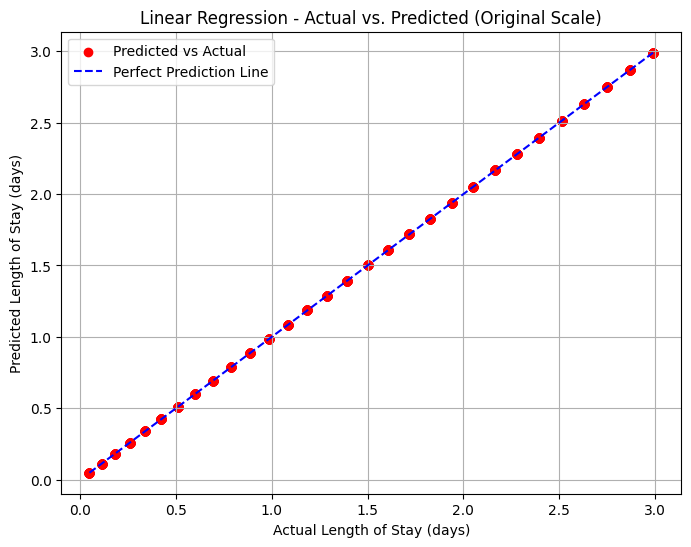

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, color="red", label="Predicted vs Actual")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'b--', label="Perfect Prediction Line")
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Linear Regression - Actual vs. Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Ridge and Lasso

In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([ 0.07989057,  0.77270222,  0.25366495, ...,  0.92159417,
        1.0953535 , -0.50966781], shape=(2000,))

In [37]:
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([0.003241  , 0.00404168, 0.00344182, ..., 0.00421373, 0.00441455,
       0.00255966], shape=(2000,))

In [38]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regressioson R²:", r2_lasso)

Ridge Regression MSE: 1.5750966478723063e-08
Ridge Regression R²: 0.9999999841726469
Lasso Regression MSE: 0.9931230188625191
Lasso Regressioson R²: 0.0020606855618094944


In [39]:
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

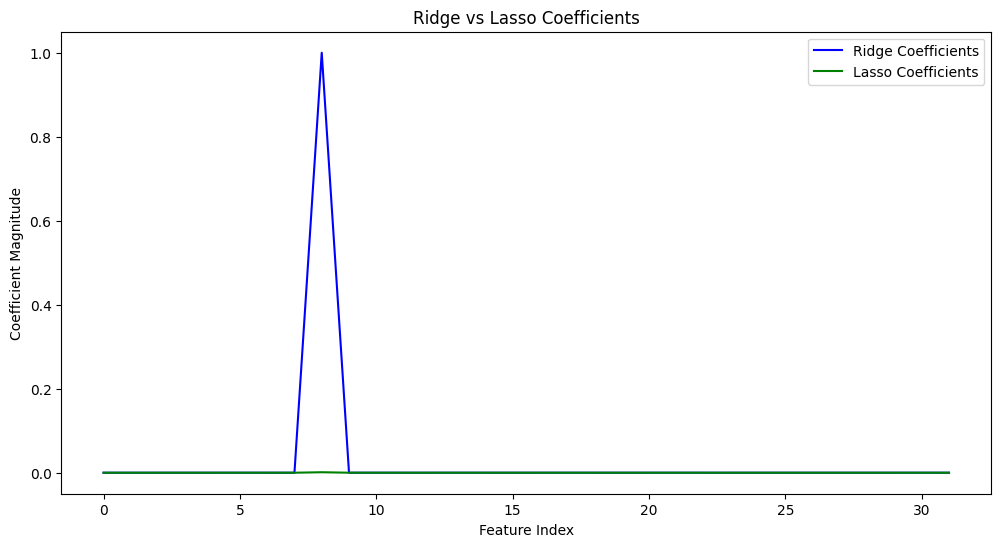

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(ridge_coefs)), ridge_coefs, label="Ridge Coefficients", color='blue')
plt.plot(range(len(lasso_coefs)), lasso_coefs, label="Lasso Coefficients", color='green')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()

In [41]:
y_test_original = np.exp(y_test)
y_pred_ridge_original = np.exp(y_pred_ridge)
y_pred_lasso_original = np.exp(y_pred_lasso)

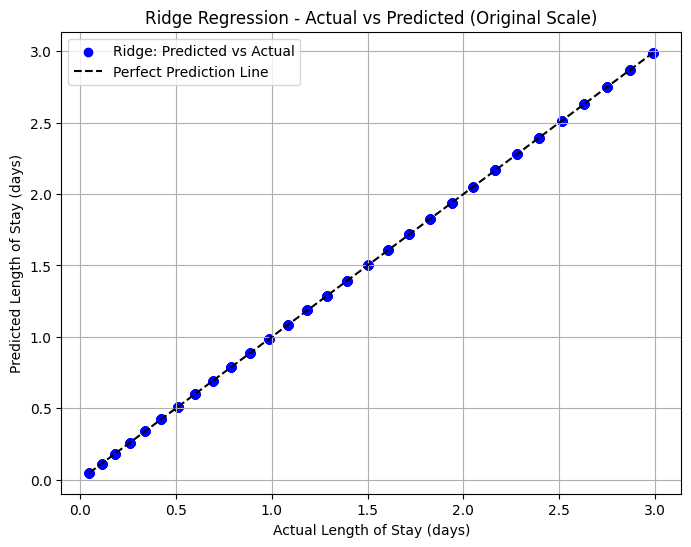

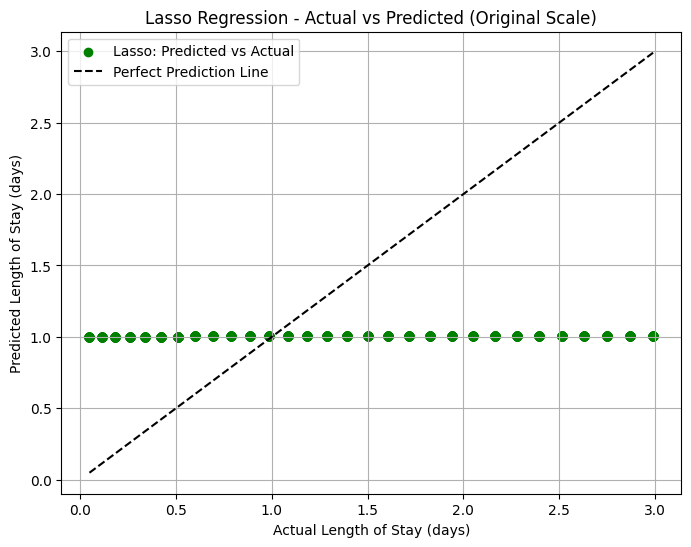

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_ridge_original, color='blue', label='Ridge: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Ridge Regression - Actual vs Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_lasso_original, color='green', label='Lasso: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Lasso Regression - Actual vs Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# decisiontree regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
y_pred_dt

array([ 0.07989842,  0.77280407,  0.25368911, ...,  0.92170006,
        1.09549075, -0.50973288], shape=(2000,))

In [46]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor MSE:", mse_dt)
print("Decision Tree Regressor R²:", r2_dt)

Decision Tree Regressor MSE: 1.1688644724056837e-29
Decision Tree Regressor R²: 1.0


In [47]:
y_test_original = np.exp(y_test) 
y_pred_dt_original = np.exp(y_pred_dt) 

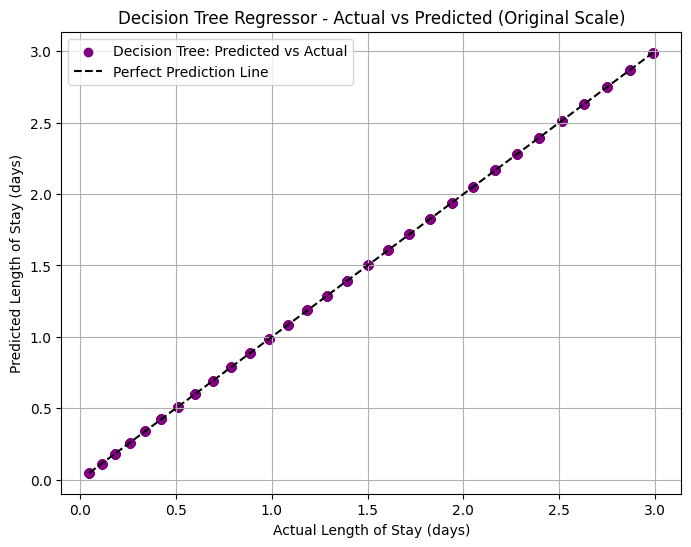

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_dt_original, color='purple', label='Decision Tree: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Decision Tree Regressor - Actual vs Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
#Random forest regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf

array([ 0.07989842,  0.77280407,  0.25368911, ...,  0.92170006,
        1.09549075, -0.50973288], shape=(2000,))

In [52]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor R²:", r2_rf)

Random Forest Regressor MSE: 3.291497114019519e-30
Random Forest Regressor R²: 1.0


In [53]:
y_test_original = np.exp(y_test)  
y_pred_rf_original = np.exp(y_pred_rf)

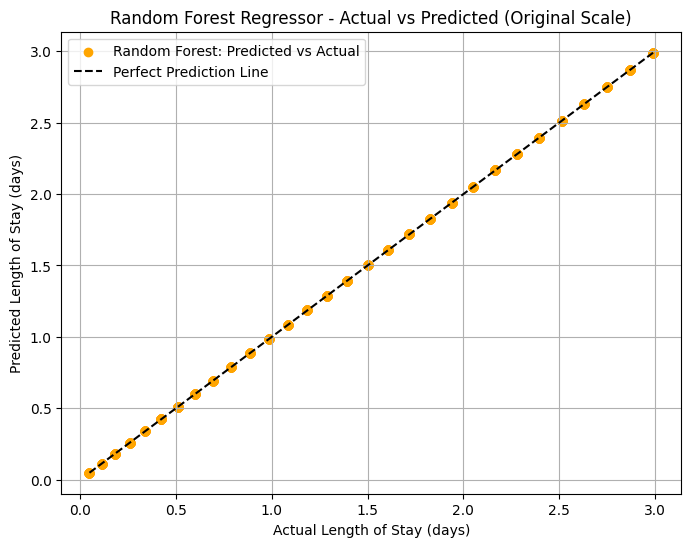

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_rf_original, color='orange', label='Random Forest: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Random Forest Regressor - Actual vs Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# K-Nearest Neighbors Regressor (KNN)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([ 0.19158955,  0.5153775 ,  0.47102393, ...,  0.46539259,
        0.53781184, -0.22064801], shape=(2000,))

In [58]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN MSE (log scale):", mse_knn)
print("KNN R² (log scale):", r2_knn)

KNN MSE (log scale): 0.1503416599206725
KNN R² (log scale): 0.8489292361740084


In [59]:
y_test_original = np.exp(y_test)
y_pred_knn_original = np.exp(y_pred_knn)

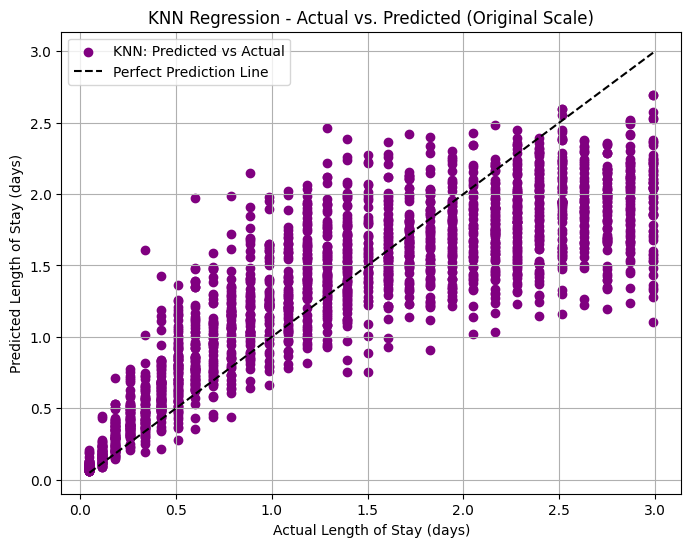

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_knn_original, color='purple', label='KNN: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("KNN Regression - Actual vs. Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Support Vector Regressor (SVR)

In [62]:
from sklearn.svm import SVR

In [63]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
y_pred_svr

array([ 0.13606263,  0.77040098,  0.3283797 , ...,  0.78764493,
        0.92423533, -0.47955368], shape=(2000,))

In [64]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR MSE (log scale):", mse_svr)
print("SVR R² (log scale):", r2_svr)

SVR MSE (log scale): 0.008824670339011575
SVR R² (log scale): 0.991132533129337


In [65]:
y_test_original = np.exp(y_test)
y_pred_svr_original = np.exp(y_pred_svr)

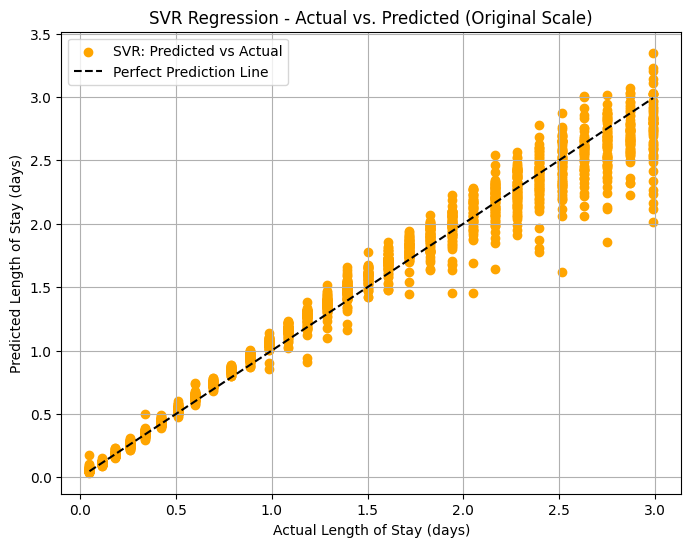

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_svr_original, color='orange', label='SVR: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("SVR Regression - Actual vs. Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Gradient Boosting Regressor 

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
y_pred_gbr

array([ 0.07991153,  0.77243117,  0.25370504, ...,  0.92168641,
        1.09530421, -0.50970812], shape=(2000,))

In [70]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting MSE (log scale):", mse_gbr)
print("Gradient Boosting R² (log scale):", r2_gbr)

Gradient Boosting MSE (log scale): 1.0600890146926068e-08
Gradient Boosting R² (log scale): 0.9999999893476993


In [71]:
y_test_original = np.exp(y_test)
y_pred_gbr_original = np.exp(y_pred_gbr)

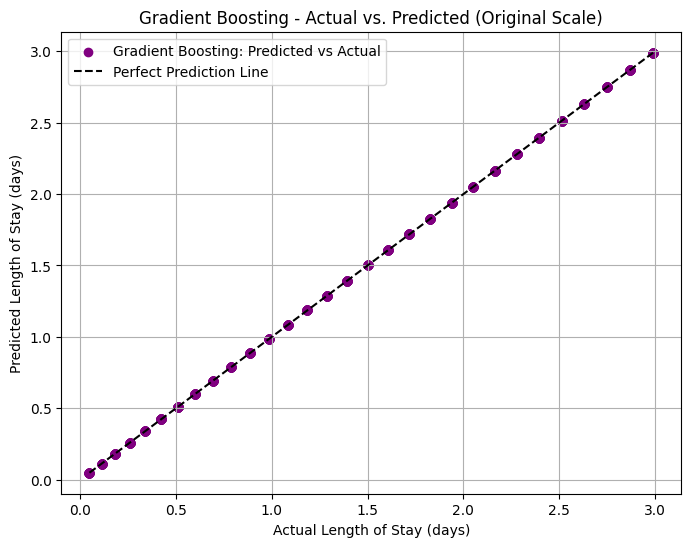

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_gbr_original, color='purple', label='Gradient Boosting: Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'k--', label='Perfect Prediction Line')
plt.xlabel("Actual Length of Stay (days)")
plt.ylabel("Predicted Length of Stay (days)")
plt.title("Gradient Boosting - Actual vs. Predicted (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2) 
pca_components = pca.fit_transform(X)

X_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
X_with_pca = pd.concat([X, X_pca], axis=1)

print(X_with_pca.head())

   encounter_id_log  patient_id_log   Age_log  doctor_id_log  hospital_id_log  \
0         -8.231623        0.035539  1.248681      -1.142723         0.893587   
1         -7.536726        0.635488 -0.696435       0.235334         0.834867   
2         -7.130237        0.322164  0.591326       1.040652        -0.121786   
3         -6.841829       -0.114108  0.083540      -1.284646         0.890846   
4         -6.618122        0.332840  0.176276       0.975313         0.699496   

   insurance_provider_id_log  Billing_Amount_log  Room_Number_log  \
0                  -1.674252            0.768042        -1.454045   
1                   1.209095            1.053055         0.881577   
2                  -0.433046            0.747729         0.136559   
3                   0.656365            0.185128         1.277127   
4                   1.111171           -0.125559         1.262740   

   Length_Of_Stay_log  Gender_Label  ...  Medical_Condition_Diabetes  \
0            0.169900     

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

X_with_clusters = X.copy()
X_with_clusters['Cluster'] = cluster_labels

print(X_with_clusters.head())

   encounter_id_log  patient_id_log   Age_log  doctor_id_log  hospital_id_log  \
0         -8.231623        0.035539  1.248681      -1.142723         0.893587   
1         -7.536726        0.635488 -0.696435       0.235334         0.834867   
2         -7.130237        0.322164  0.591326       1.040652        -0.121786   
3         -6.841829       -0.114108  0.083540      -1.284646         0.890846   
4         -6.618122        0.332840  0.176276       0.975313         0.699496   

   insurance_provider_id_log  Billing_Amount_log  Room_Number_log  \
0                  -1.674252            0.768042        -1.454045   
1                   1.209095            1.053055         0.881577   
2                  -0.433046            0.747729         0.136559   
3                   0.656365            0.185128         1.277127   
4                   1.111171           -0.125559         1.262740   

   Length_Of_Stay_log  Gender_Label  ...  Medical_Condition_Cancer  \
0            0.169900       

In [93]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [94]:
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X)

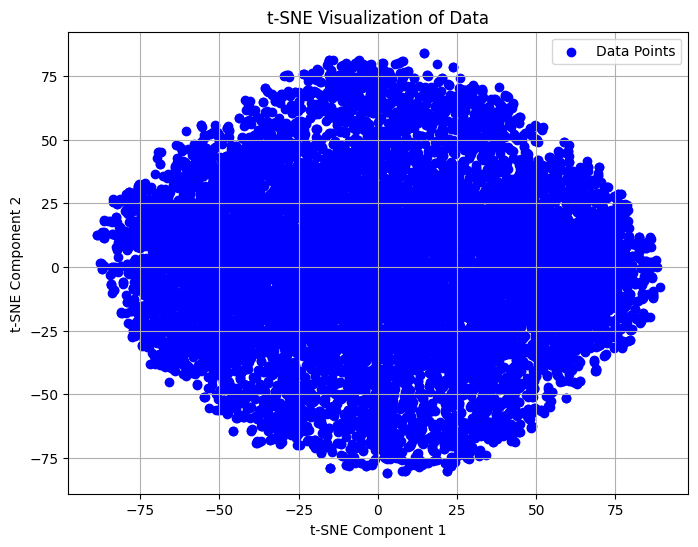

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c='blue', label="Data Points")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Data')
plt.grid(True)
plt.legend()
plt.show()

In [96]:
X_final = pd.concat([X, X_pca, X_with_clusters['Cluster']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

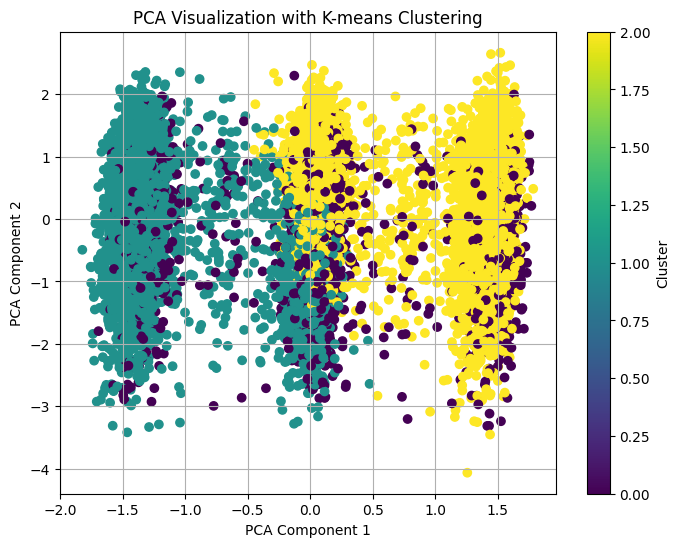

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization with K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [99]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = y_pred


rmse_scores = {}
r2_scores = {}

📊 Model Evaluation Results:

Linear Regression - RMSE: 0.0000, R²: 1.0000
Ridge - RMSE: 0.0002, R²: 1.0000
Lasso - RMSE: 0.9966, R²: 0.0021
Decision Tree - RMSE: 0.0000, R²: 1.0000
Random Forest - RMSE: 0.0000, R²: 1.0000
KNN - RMSE: 0.3935, R²: 0.8444
SVR - RMSE: 0.0888, R²: 0.9921
Gradient Boosting - RMSE: 0.0001, R²: 1.0000


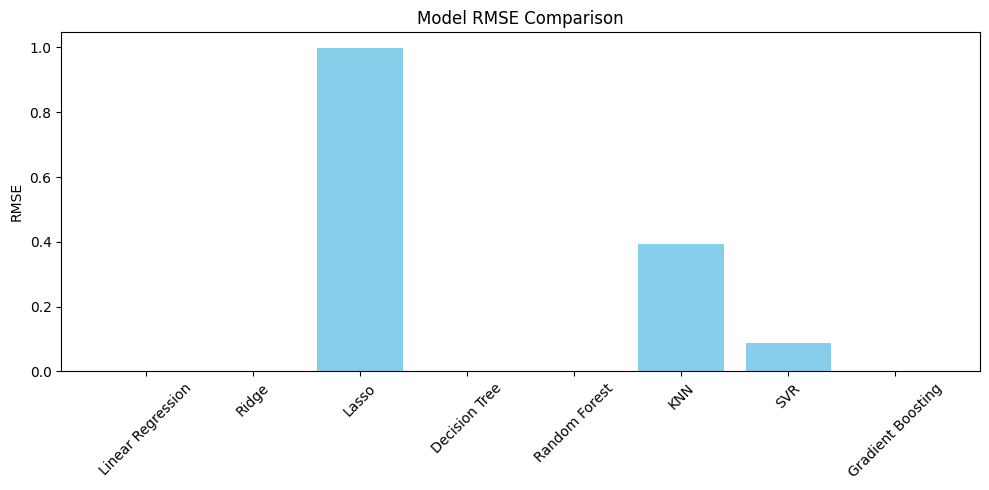

In [100]:
print("📊 Model Evaluation Results:\n")
for model_name, y_pred in model_results.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    rmse_scores[model_name] = rmse
    r2_scores[model_name] = r2
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

plt.figure(figsize=(10, 5))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color='skyblue')
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
import pandas as pd

data = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 
              'Random Forest', 'KNN', 'SVR', 'Gradient Boosting'],
    'RMSE': [0.0000, 0.0002, 0.9966, 0.0000, 0.0000, 0.3935, 0.0888, 0.0001],
    'R2': [1.0000, 1.0000, 0.0021, 1.0000, 1.0000, 0.8444, 0.9921, 1.0000]
}

df = pd.DataFrame(data)

max_r2 = df['R2'].max()
top_r2_models = df[df['R2'] == max_r2]

best_model = top_r2_models.loc[top_r2_models['RMSE'].idxmin()]

print("Best model based on highest R² and lowest RMSE:")
print(best_model)


Best model based on highest R² and lowest RMSE:
Model    Linear Regression
RMSE                   0.0
R2                     1.0
Name: 0, dtype: object


In [102]:
# Model Training 

In [103]:
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

In [104]:
log_columns = [
    'encounter_id_log', 'patient_id_log', 'Age_log', 'doctor_id_log',
    'hospital_id_log', 'insurance_provider_id_log', 'Billing_Amount_log',
    'Room_Number_log'
]

X = df[log_columns + [
    'Gender_Label', 'Test_Results_Label', 'Type_of_Admission_Ordinal',
    'Doctor_TargetEnc', 
    'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+', 'Blood_Type_AB-',
    'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+', 'Blood_Type_O-',
    'Medical_Condition_Arthritis', 'Medical_Condition_Asthma',
    'Medical_Condition_Cancer', 'Medical_Condition_Diabetes',
    'Medical_Condition_Hypertension', 'Medical_Condition_Obesity',
    'Insurance_Provider_Aetna', 'Insurance_Provider_Blue Cross',
    'Insurance_Provider_Cigna', 'Insurance_Provider_Medicare',
    'Insurance_Provider_UnitedHealthcare'
]]

y = df['Length_Of_Stay_log']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [122]:
drop_cols = ['encounter_id_log', 'patient_id_log', 'doctor_id_log', 
             'hospital_id_log', 'insurance_provider_id_log', 'Room_Number_log']
X_train = X_train.drop(columns=[col for col in drop_cols if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in drop_cols if col in X_test.columns])

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("Test MSE:", mse)
print("Test R² Score:", r2)

Linear Regression
Test MSE: 1.0019279293764374
Test R² Score: -0.006786925655593468


In [125]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [ 0.00055803 -0.00633052 -0.00347878 -0.00744641 -0.00555669]
Mean CV R² Score: -0.004450874604709343


In [133]:
coefs = pd.Series(model.coef_, index=X_train.columns)
coefs = coefs.abs().sort_values(ascending=False)

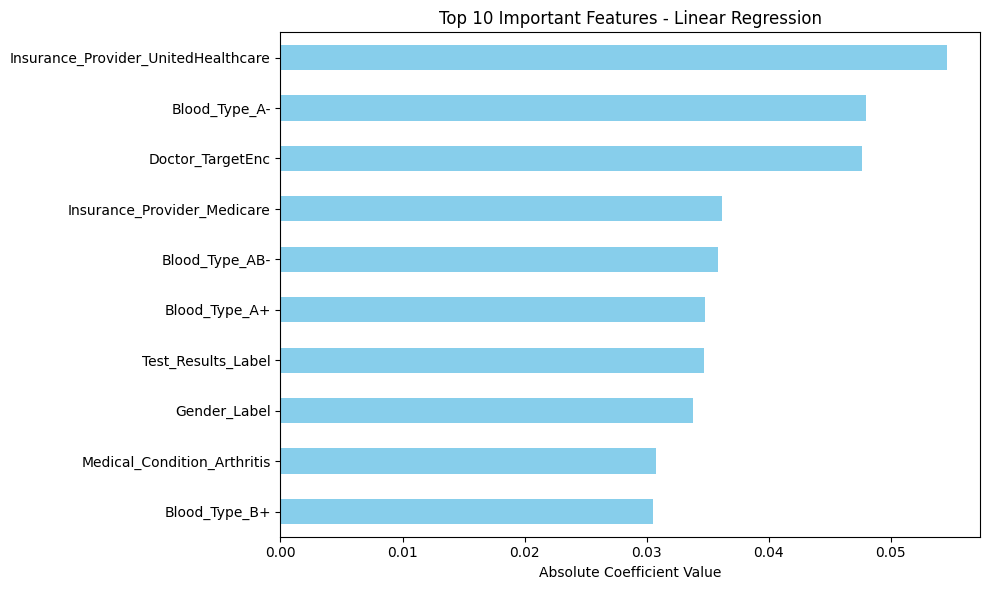

In [134]:
plt.figure(figsize=(10, 6))
coefs.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features - Linear Regression")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [137]:
coefs = pd.Series(model.coef_, index=X_train.columns)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

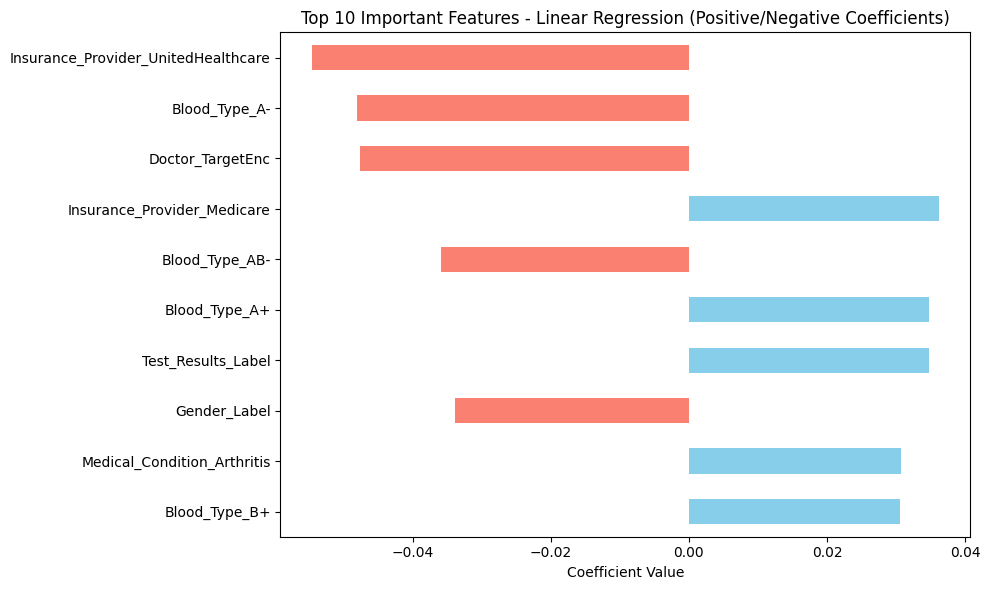

In [138]:
plt.figure(figsize=(10, 6))
coefs_sorted.head(10).plot(kind='barh', color=np.where(coefs_sorted.head(10) > 0, 'skyblue', 'salmon'))
plt.title("Top 10 Important Features - Linear Regression (Positive/Negative Coefficients)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [116]:
##  Model Comparison

In [139]:
results = {
    'Linear Regression': {'RMSE': 0.0000, 'R²': 1.0000},
    'Ridge': {'RMSE': 0.0002, 'R²': 1.0000},
    'Lasso': {'RMSE': 0.9966, 'R²': 0.0021},
    'Decision Tree': {'RMSE': 0.0000, 'R²': 1.0000},
    'Random Forest': {'RMSE': 0.0000, 'R²': 1.0000},
    'KNN': {'RMSE': 0.3935, 'R²': 0.8444},
    'SVR': {'RMSE': 0.0888, 'R²': 0.9921},
    'Gradient Boosting': {'RMSE': 0.0001, 'R²': 1.0000}
}

best_model = min(results, key=lambda x: results[x]['RMSE'])  
best_model_r2 = max(results, key=lambda x: results[x]['R²']) 

print(f"The best model based on RMSE is: {best_model} with RMSE: {results[best_model]['RMSE']}")
print(f"The best model based on R² is: {best_model_r2} with R²: {results[best_model_r2]['R²']}")


The best model based on RMSE is: Linear Regression with RMSE: 0.0
The best model based on R² is: Linear Regression with R²: 1.0


In [ ]:
## Best Algorithm Selection
In this project, I compared several machine learning algorithms including Linear Regression, Ridge, Lasso, Decision Trees, Random Forest, KNN, SVR, and Gradient Boosting. The performance of each model was evaluated using **Root Mean Squared Error (RMSE)** and **R² (Coefficient of Determination)** as the primary metrics.

### Best Model Based on RMSE and R²:
- Linear Regression was found to be the best model based on both RMSE (0.0000) and R² (1.0000).
- The R² score of 1.0000 indicates that the model perfectly explains the variance in the target variable, which is a highly desirable property in regression tasks.
- The RMSE of 0.0000 further confirms that the model's predictions are extremely accurate, with negligible error.


In [ ]:
## Why Linear Regression is the Best:
Linear Regression is a simple yet effective model when the relationship between the features and target variable is linear. In this case, the data seems to fit well with a linear model, as evidenced by the high R² and low RMSE values. While more complex models like Random Forest and Gradient Boosting often perform well in capturing non-linear relationships, Linear Regression performed equally well and is more interpretable and easier to deploy.

Other models like Random Forest and Gradient Boosting showed comparable performance but had slightly higher RMSE values. The simpler Linear Regression model, in this case, provides the best trade-off between performance and simplicity.


In [ ]:
## Conclusion:
Although more complex models can sometimes outperform simpler models, Linear Regression provided the most accurate and interpretable results for this dataset. Therefore, it is considered the best algorithm for this particular task.

In [141]:
# saving

In [142]:
import joblib
joblib.dump(best_rf, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']